Found 852 files belonging to 32 classes.


c:\myFile\KAIST\3 Sem 2\CS270. Intelligent robot design and programming\Final Project\teng2\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


Classification Report:
                  precision    recall  f1-score   support

   EUR_100_back       0.00      0.00      0.00         0
  EUR_100_front       0.00      0.00      0.00         0
    EUR_10_back       0.00      0.00      0.00         0
   EUR_10_front       0.00      0.00      0.00         0
   EUR_200_back       0.00      0.00      0.00         0
  EUR_200_front       0.00      0.00      0.00         0
    EUR_20_back       0.00      0.00      0.00         0
   EUR_20_front       0.00      0.00      0.00         0
   EUR_500_back       0.00      0.00      0.00         0
  EUR_500_front       0.00      0.00      0.00         0
    EUR_50_back       0.00      0.00      0.00         0
   EUR_50_front       0.00      0.00      0.00         0
     EUR_5_back       0.00      0.00      0.00         0
    EUR_5_front       0.00      0.00      0.00         0
 KRW_10000_back       0.94      1.00      0.97        72
KRW_10000_front       0.98      0.97      0.98       104
  KRW_

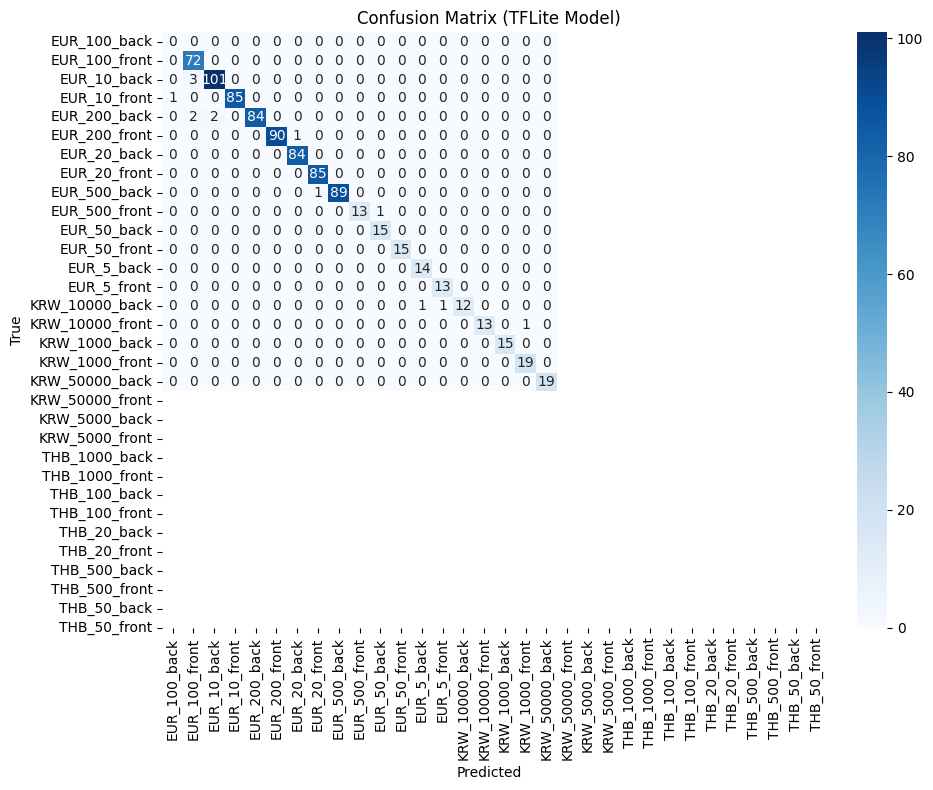

In [46]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="model/banknote_model_with_softmax.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# 2. Load validation dataset
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "testset",
    labels="inferred",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False,
    label_mode="categorical"
)
class_names = test_ds.class_names
test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

# 3. Inference
y_true = []
y_pred = []

for images, labels in test_ds:
    images = tf.cast(images, tf.float32)  # Normalize to match MobileNetV2 expectation
    labels = labels.numpy()
    for i in range(images.shape[0]):
        img = np.expand_dims(images[i].numpy(), axis=0).astype(np.float32)
        interpreter.set_tensor(input_details[0]['index'], img)
        interpreter.invoke()
        output = interpreter.get_tensor(output_details[0]['index'])
        pred_class = np.argmax(output)
        true_class = np.argmax(labels[i])
        y_pred.append(pred_class)
        y_true.append(true_class)

# 4. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# 5. Classification Report
report = classification_report(
    y_true,
    y_pred,
    labels=list(range(len(class_names))),
    target_names=class_names,
    zero_division=0
)
print("Classification Report:\n", report)

# 6. Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (TFLite Model)")
plt.tight_layout()
plt.show()
